In [1]:
%matplotlib inline

In [2]:
import itertools

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import wave

In [5]:
params = dict(
    array_radius=1.0,
    speed_of_sound=3300.0,
    lowest_tone=10e3,
    highest_tone=15e3,
    num_elements=10,
    num_samples=10,
    num_tones=30,
)

In [6]:
params = [('--' + k, str(v)) for k, v in params.iteritems()]
params = itertools.chain(*params)
params = list(params)
params = wave.build_parameters_parser().parse_args(params)

In [7]:
limit = 1 / np.sqrt(2)
lhs = np.linspace(-limit, limit, params.num_samples)
rhs = 1j * lhs
samples = (lhs + rhs.reshape(-1, 1))
image = np.abs(np.sin(samples))

In [8]:
weights = wave.calculate_weights(image, params)

Optimization terminated successfully.
         Current function value: 0.000156
         Iterations: 38
         Function evaluations: 46
         Gradient evaluations: 83
         Hessian evaluations: 255


In [9]:
reconstructed = wave.simulate(weights, params)

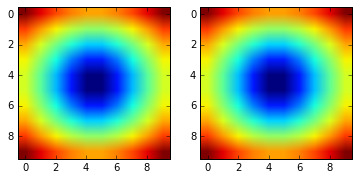

In [10]:
plt.subplot(121)
plt.imshow(reconstructed)
plt.subplot(122)
plt.imshow(image)